## **Installing necessary packages**

In [1]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


## **Using required imports and magic functions**

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import warnings
from fastai import *
from fastbook import *
from fastai.vision.all import *
warnings.filterwarnings('ignore')

## **Mounting Drive**

In [7]:
from google.colab import drive
drive.mount('/content/drive', timeout_ms=3000000)

Mounted at /content/drive


## **Initializing project folder path**

In [8]:
%cd /content/drive/MyDrive/Bengali Fish Recognizer

/content/drive/.shortcut-targets-by-id/1sWUw7QF6KFq_uiUB_0-9__3Yl3ESSNTU/Bengali Fish Recognizer


## **Dataloaders path**

In [9]:
data_loader_path = 'DataLoaders'

## **Dataloaders version**

In [10]:
version = 4

## **Fetching dataloader**

In [11]:
data_loader = torch.load(f"{data_loader_path}/DataLoader_v_{version}")

## **VGG-19**

In [ ]:
model = vision_learner(data_loader, vgg19_bn, metrics = [error_rate, accuracy])

In [ ]:
model.freeze()

SuggestedLRs(steep=0.0063095735386013985, valley=0.0020892962347716093)

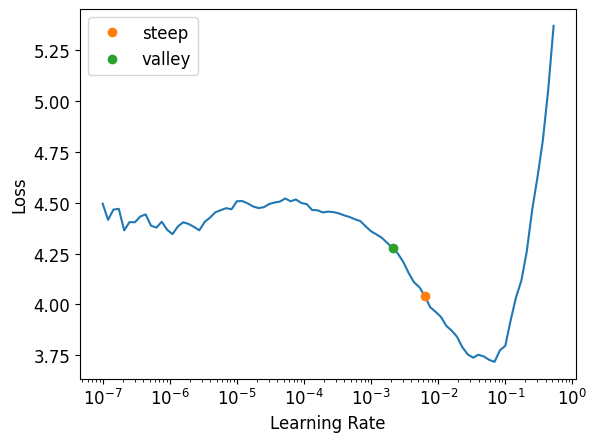

In [ ]:
model.lr_find(suggest_funcs=[steep, valley])

In [ ]:
model.fit_one_cycle(30, slice(5e-3, 3e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,4.020901,2.620323,0.790805,0.209195,00:42
1,3.124264,1.733930,0.524138,0.475862,00:42
2,2.347275,1.316221,0.411494,0.588506,00:41
3,1.846932,1.251823,0.360920,0.639080,00:43
4,1.480882,1.180038,0.331034,0.668966,00:41
5,1.305050,1.230594,0.342529,0.657471,00:41
6,1.234437,1.136316,0.312644,0.687356,00:43
7,1.116994,1.245201,0.326437,0.673563,00:41
8,1.069479,1.122299,0.324138,0.675862,00:43
9,0.989526,1.211932,0.324138,0.675862,00:43


In [ ]:
model.unfreeze()

SuggestedLRs(steep=2.2908675418875646e-06, valley=8.31763736641733e-06)

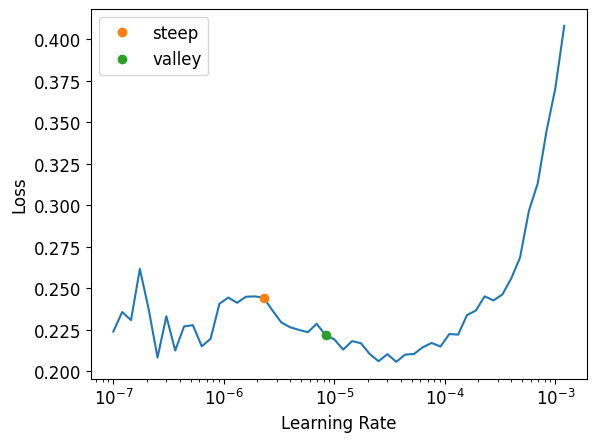

In [ ]:
model.lr_find(suggest_funcs=[steep, valley])

In [ ]:
model.fit_one_cycle(30, slice(6.5e-6, 3.2e-6))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.214521,0.901005,0.252874,0.747126,00:46
1,0.224742,0.900395,0.250575,0.749425,00:47
2,0.237028,0.890526,0.222989,0.777012,00:46
3,0.227483,0.889899,0.234483,0.765517,00:46
4,0.210038,0.878274,0.234483,0.765517,00:46
5,0.205777,0.900981,0.232184,0.767816,00:46
6,0.204321,0.897475,0.239080,0.760920,00:46
7,0.209894,0.886528,0.220690,0.779310,00:45
8,0.203061,0.914508,0.241379,0.758621,00:46
9,0.211691,0.919244,0.243678,0.756322,00:45


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.214521,0.901005,0.252874,0.747126,00:46
1,0.224742,0.900395,0.250575,0.749425,00:47
2,0.237028,0.890526,0.222989,0.777012,00:46
3,0.227483,0.889899,0.234483,0.765517,00:46
4,0.210038,0.878274,0.234483,0.765517,00:46
5,0.205777,0.900981,0.232184,0.767816,00:46
6,0.204321,0.897475,0.239080,0.760920,00:46
7,0.209894,0.886528,0.220690,0.779310,00:45
8,0.203061,0.914508,0.241379,0.758621,00:46
9,0.211691,0.919244,0.243678,0.756322,00:45


In [ ]:
model.export(f"models/VGG19_2.pkl")

In [ ]:
model.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.276471,1.812962,0.474453,0.525547,07:43


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.004951,1.507008,0.425182,0.574818,00:58
1,1.700842,1.325693,0.388686,0.611314,00:57
2,1.364484,1.273146,0.370438,0.629562,00:59
3,1.086450,1.183003,0.326642,0.673358,00:56
4,0.849730,1.181564,0.310219,0.689781,01:00
5,0.638852,1.054434,0.297445,0.702555,00:56
6,0.506783,1.070654,0.290146,0.709854,00:57
7,0.380864,1.034213,0.277372,0.722628,00:58
8,0.300825,1.009034,0.277372,0.722628,00:54
9,0.297017,1.007336,0.268248,0.731752,00:56


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

In [ ]:
model.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.297285,1.122256,0.291971,0.708029,00:50


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.299263,1.069798,0.281022,0.718978,00:56
1,0.254742,1.052477,0.271898,0.728102,00:58
2,0.230395,1.088585,0.271898,0.728102,00:58
3,0.282867,1.397781,0.333942,0.666058,00:55
4,0.322868,1.281534,0.297445,0.702555,00:59
5,0.344101,1.461204,0.332117,0.667883,00:56
6,0.348357,1.395899,0.281022,0.718978,00:56
7,0.312373,1.375578,0.302920,0.697080,00:58
8,0.290833,1.311258,0.275547,0.724453,00:55
9,0.223796,1.268221,0.259124,0.740876,00:57


In [ ]:
model_name = "VGG19"
model_version = 1

In [ ]:
model.save(f"{model_name}_{model_version}")

Path('models/VGG19_1.pth')

In [ ]:
models_path = "models"
model.export(fname=f"{models_path}/{model_name}_{model_version}.pkl")

## **Densenet - 121**

In [ ]:
model = vision_learner(data_loader, densenet121, metrics = [error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 89.4MB/s]


In [ ]:
model.freeze()

SuggestedLRs(steep=0.002511886414140463, valley=0.0010000000474974513)

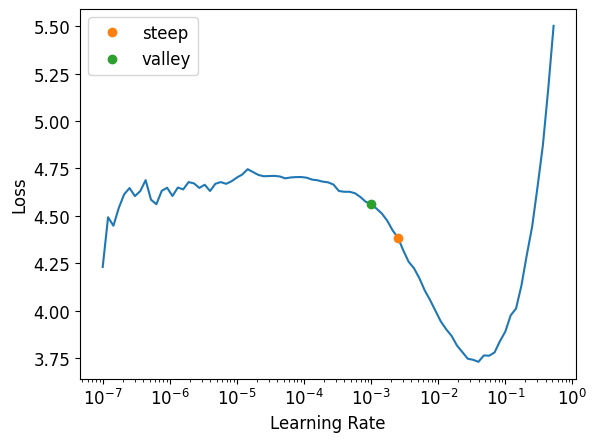

In [ ]:
model.lr_find(suggest_funcs=[steep, valley])

In [ ]:
model.fit_one_cycle(30, slice(1.3e-3, 2.8e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.798479,2.391970,0.662069,0.337931,01:31
1,2.706972,1.262322,0.390805,0.609195,00:38
2,1.879668,1.014558,0.301149,0.698851,00:37
3,1.444818,0.921401,0.282759,0.717241,00:36
4,1.150005,1.053050,0.301149,0.698851,00:38
5,0.927474,1.029000,0.285057,0.714943,00:36
6,0.812309,1.025713,0.280460,0.719540,00:37
7,0.734574,1.047232,0.273563,0.726437,00:37
8,0.702403,1.119422,0.241379,0.758621,00:36
9,0.620507,1.054971,0.287356,0.712644,00:38


In [ ]:
model.save("denseNet")

Path('models/denseNet.pth.pth')

In [ ]:
model.unfreeze()

SuggestedLRs(steep=7.585775847473997e-07, valley=1.4454397387453355e-05)

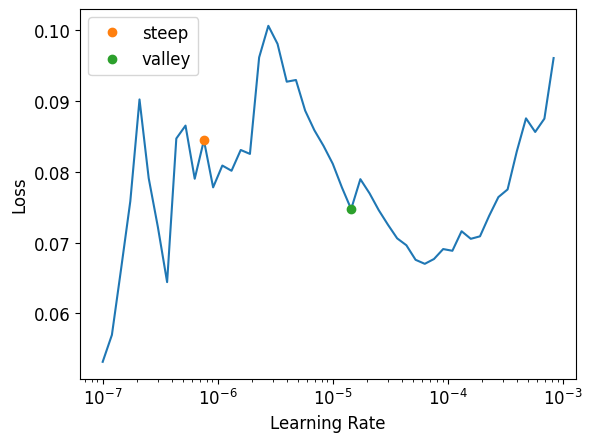

In [ ]:
model.lr_find(suggest_funcs=[steep, valley])

In [ ]:
model.fit_one_cycle(30, slice(2e-5, 8e-7))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.059719,0.969050,0.200000,0.800000,00:40
1,0.062378,0.976410,0.202299,0.797701,00:39
2,0.081196,0.966318,0.195402,0.804598,00:41
3,0.068839,0.958717,0.200000,0.800000,00:39
4,0.065759,0.973771,0.195402,0.804598,00:40
5,0.070529,0.981879,0.209195,0.790805,00:40
6,0.064118,0.976141,0.206897,0.793103,00:39
7,0.062540,0.966156,0.209195,0.790805,00:41
8,0.057491,0.976150,0.197701,0.802299,00:40
9,0.061591,0.950599,0.209195,0.790805,00:41


In [ ]:
model.export("models/densenet121.pkl")

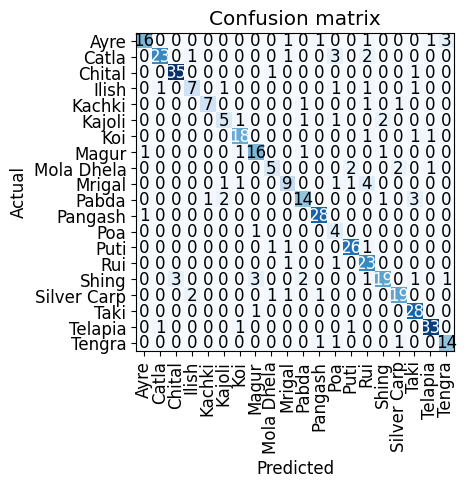

In [ ]:
interpreter = ClassificationInterpretation.from_learner(model)
interpreter.plot_confusion_matrix()

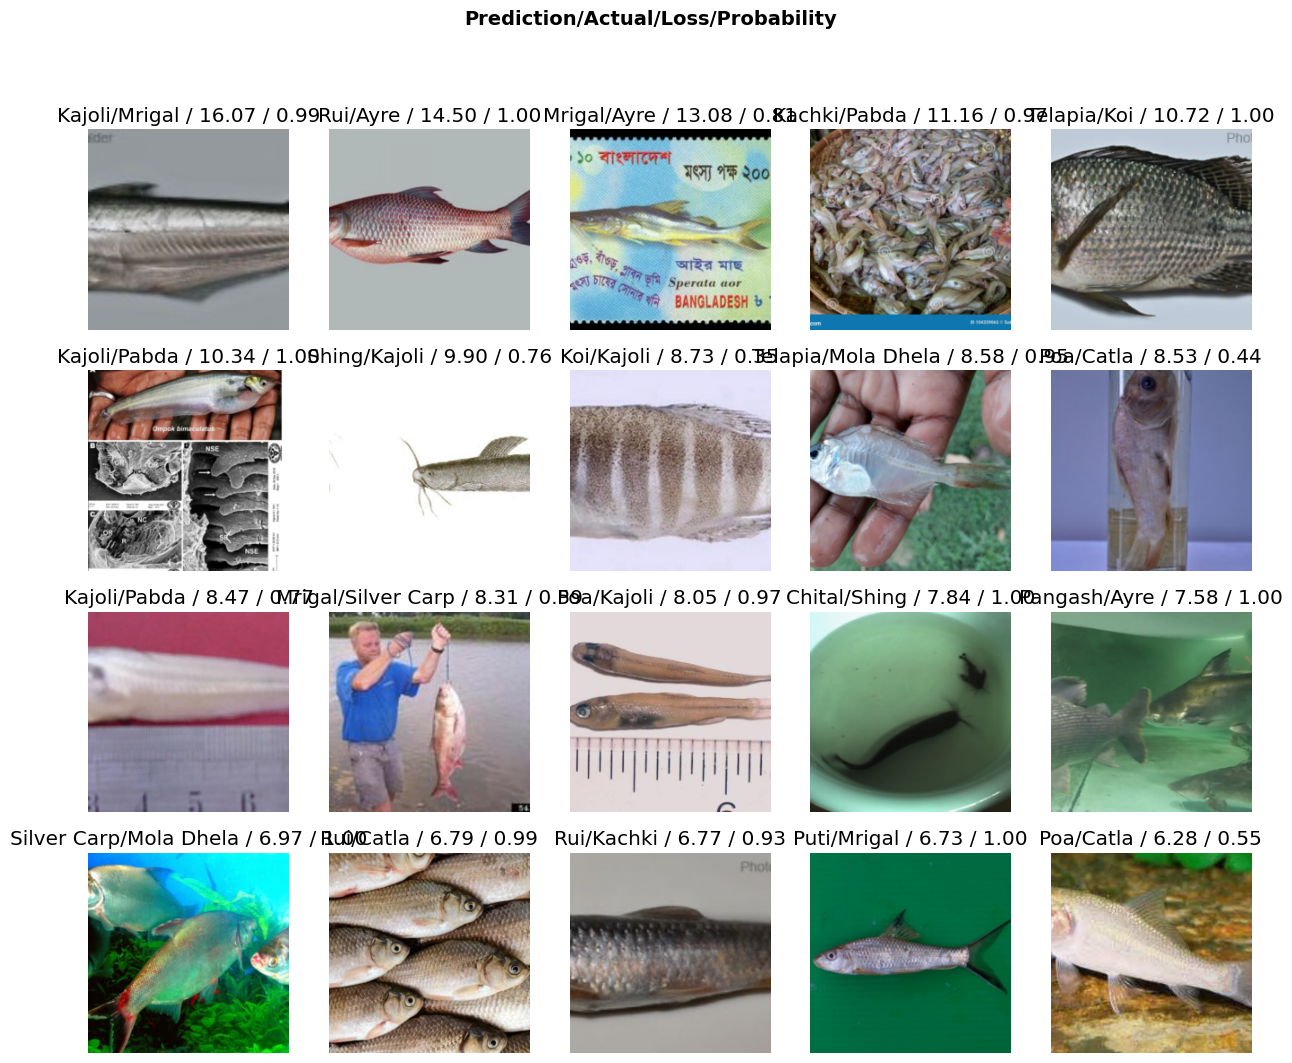

In [ ]:
interpreter.plot_top_losses(20, nrows=4)

## **ResNet-50**

In [21]:
model = vision_learner(data_loader, resnet50, metrics = [error_rate, accuracy])

In [22]:
model.freeze()

In [23]:
model.fine_tune(30)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.082971,1.629482,0.452874,0.547126,00:37


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.626941,1.281199,0.372414,0.627586,00:40
1,1.390759,1.184057,0.360920,0.639080,00:41
2,1.160382,1.050892,0.321839,0.678161,00:38
3,0.975341,0.977485,0.301149,0.698851,00:38
4,0.822018,0.965569,0.301149,0.698851,00:37
5,0.676005,0.926240,0.259770,0.740230,00:39
6,0.533551,0.793027,0.227586,0.772414,00:37
7,0.461382,0.862447,0.229885,0.770115,00:39
8,0.387119,0.824627,0.222989,0.777012,00:39
9,0.333096,0.829024,0.225287,0.774713,00:39


In [24]:
model.unfreeze()

In [25]:
model.fine_tune(30)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.043364,0.850425,0.195402,0.804598,00:39


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.059127,0.844163,0.183908,0.816092,00:38
1,0.054311,0.873015,0.190805,0.809195,00:38
2,0.050160,0.838942,0.174713,0.825287,00:40
3,0.045958,0.830535,0.177011,0.822989,00:37
4,0.043959,0.862596,0.193103,0.806897,00:38
5,0.055940,0.873921,0.193103,0.806897,00:37
6,0.069526,0.970891,0.206897,0.793103,00:40
7,0.088153,0.942132,0.206897,0.793103,00:38
8,0.101600,1.011065,0.202299,0.797701,00:38
9,0.099142,1.005053,0.202299,0.797701,00:38


In [26]:
models_path = "models"
model.export(fname=f"{models_path}/ResNet50_2.pkl")

SuggestedLRs(steep=0.0030199517495930195, valley=0.001737800776027143)

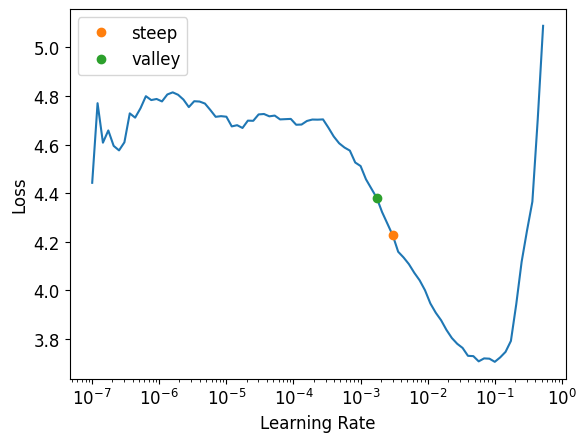

In [14]:
model.lr_find(suggest_funcs=[steep, valley])

In [15]:
model.fit_one_cycle(30, slice(2.15e-3, 2.85e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.854098,2.269931,0.664368,0.335632,02:13
1,2.811980,1.509158,0.443678,0.556322,00:35
2,2.125722,1.335326,0.386207,0.613793,00:35
3,1.653703,1.208549,0.351724,0.648276,00:36
4,1.343463,1.214263,0.328736,0.671264,00:35
5,1.141364,1.176691,0.333333,0.666667,00:38
6,0.981389,1.191627,0.333333,0.666667,00:35
7,0.822069,1.128986,0.294253,0.705747,00:35
8,0.725739,1.199733,0.326437,0.673563,00:36
9,0.641645,1.123191,0.317241,0.682759,00:38


In [16]:
model.unfreeze()

In [ ]:
model.save('resnet')

SuggestedLRs(steep=7.585775847473997e-07, valley=7.585775847473997e-07)

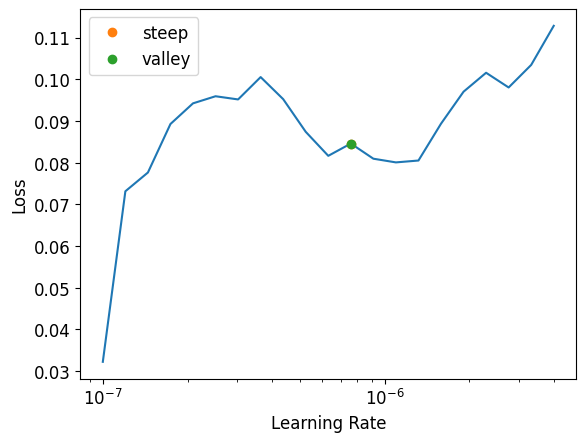

In [17]:
model.lr_find(suggest_funcs=[steep, valley])

In [18]:
model.fit_one_cycle(30, lr_max = 7.5e-07)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.116077,0.956493,0.232184,0.767816,00:40
1,0.118977,0.979289,0.241379,0.758621,00:37
2,0.131541,0.979260,0.229885,0.770115,00:38
3,0.122074,0.965089,0.239080,0.760920,00:38
4,0.112466,0.976288,0.245977,0.754023,00:37
5,0.133276,0.972310,0.236782,0.763218,00:40
6,0.121138,0.993927,0.243678,0.756322,00:38
7,0.124860,0.960176,0.239080,0.760920,00:38
8,0.110698,0.965896,0.236782,0.763218,00:37
9,0.100997,0.977444,0.234483,0.765517,00:39


In [ ]:
model.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.267956,1.603639,0.452874,0.547126,07:47


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.676470,1.265776,0.381609,0.618391,00:39
1,1.379133,1.134068,0.367816,0.632184,00:40
2,1.152192,1.081211,0.312644,0.687356,00:38
3,0.908147,0.994569,0.280460,0.719540,00:38
4,0.773696,0.904269,0.268966,0.731034,00:40
5,0.639250,0.905647,0.257471,0.742529,00:39
6,0.507732,0.873886,0.225287,0.774713,00:38
7,0.405002,0.788423,0.218391,0.781609,00:38
8,0.311436,0.840227,0.218391,0.781609,00:41
9,0.273814,0.806063,0.206897,0.793103,00:37


In [19]:
model_name = "ResNet50"
model_version = 1

In [ ]:
model.save(f"{model_name}_{model_version}")

Path('models/ResNet50_1.pth')

In [ ]:
model.load(f"{model_name}_{model_version}")

In [ ]:
model.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.091256,0.961863,0.216092,0.783908,00:46


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.144502,0.862162,0.188506,0.811494,00:40
1,0.100355,0.800600,0.188506,0.811494,00:40
2,0.087788,0.795955,0.177011,0.822989,00:39
3,0.086805,0.776309,0.167816,0.832184,00:41
4,0.096898,0.870835,0.190805,0.809195,00:39
5,0.120968,0.950779,0.204598,0.795402,00:39
6,0.128117,0.914235,0.193103,0.806897,00:40
7,0.142035,0.952296,0.188506,0.811494,00:39
8,0.131400,0.981338,0.190805,0.809195,00:39
9,0.132748,0.947321,0.202299,0.797701,00:40


In [ ]:
model.save(f"{model_name}_extended_v_2")

Path('models/ResNet50_extended_v_2.pth')

In [20]:
models_path = "models"
model.export(fname=f"{models_path}/{model_name}.pkl")